<a href="https://colab.research.google.com/github/Ashleysew2/weatherwise-Ashley-sewsurn./blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to WeatherWise – Your Weather Advisor
Enter a city name (e.g., Perth): perth 

Fetching weather data...



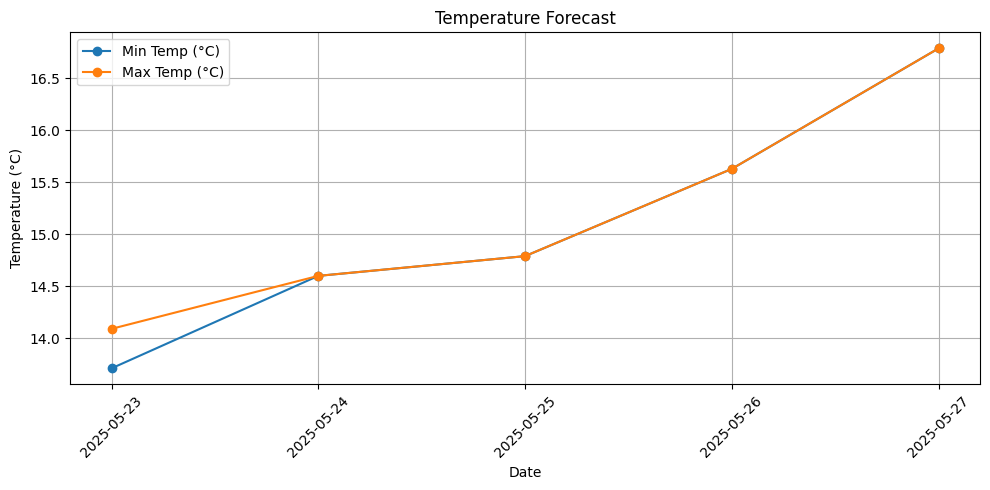

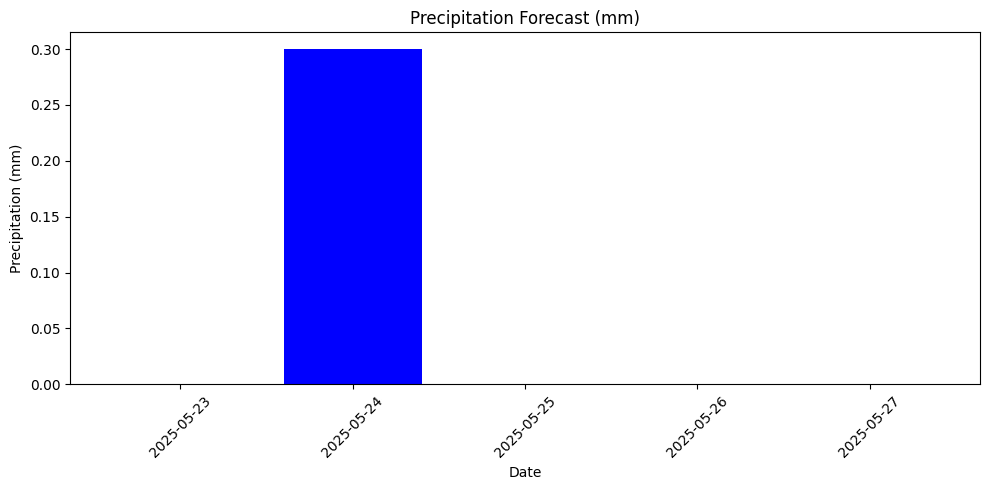


Ask a weather question (or type 'exit' to quit): what is the temperature 

Temperature forecast:
2025-05-23: 13.71°C - 14.09°C
2025-05-24: 14.6°C - 14.6°C
2025-05-25: 14.79°C - 14.79°C
2025-05-26: 15.63°C - 15.63°C
2025-05-27: 16.79°C - 16.79°C

Ask a weather question (or type 'exit' to quit): the precipitation

Precipitation forecast:
2025-05-23: 0 mm
2025-05-24: 0.3 mm
2025-05-25: 0 mm
2025-05-26: 0 mm
2025-05-27: 0 mm

Ask a weather question (or type 'exit' to quit): exit
Thanks for using WeatherWise! Goodbye.


In [ ]:
# WeatherWise: Intelligent Weather Analysis & Advisory System
# Author: Your Name
# Description:
# This program fetches weather data for a given location,
# visualizes temperature and precipitation forecasts,
# and allows simple natural language questions about the weather.

import requests
import matplotlib.pyplot as plt

# ---------------------------
# Configuration
# ---------------------------
API_KEY = '590b15e27364a4ffb873274c9e33ab3b'  # Replace with your actual API key
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast"

# ---------------------------
# Fetch Weather Data Function
# ---------------------------
def get_weather_data(city, days=5):
    """
    Fetch weather forecast data for the given city from OpenWeatherMap API.

    Args:
        city (str): City name (e.g., "Perth")
        days (int): Number of days to forecast (up to 5)

    Returns:
        dict: Parsed weather forecast data or None if error.
    """
    try:
        params = {
            "q": city,
            "appid": API_KEY,
            "units": "metric",
            "cnt": days * 8  # API returns data in 3-hour intervals, 8 per day
        }
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        # Extract daily data (at noon time) for each day
        daily_data = []
        for item in data['list']:
            if "12:00:00" in item['dt_txt']:
                day_info = {
                    "date": item['dt_txt'].split()[0],
                    "temp_min": item['main']['temp_min'],
                    "temp_max": item['main']['temp_max'],
                    "description": item['weather'][0]['description'],
                    "precipitation": item.get('rain', {}).get('3h', 0) + item.get('snow', {}).get('3h', 0)
                }
                daily_data.append(day_info)
        return daily_data

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None

# ---------------------------
# Visualization Functions
# ---------------------------
def plot_temperature_forecast(daily_data):
    """
    Plot temperature forecast (min and max) over days.

    Args:
        daily_data (list): List of daily weather dictionaries.
    """
    dates = [d['date'] for d in daily_data]
    temp_mins = [d['temp_min'] for d in daily_data]
    temp_maxs = [d['temp_max'] for d in daily_data]

    plt.figure(figsize=(10,5))
    plt.plot(dates, temp_mins, label='Min Temp (°C)', marker='o')
    plt.plot(dates, temp_maxs, label='Max Temp (°C)', marker='o')
    plt.title('Temperature Forecast')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_precipitation_forecast(daily_data):
    """
    Plot precipitation forecast over days.

    Args:
        daily_data (list): List of daily weather dictionaries.
    """
    dates = [d['date'] for d in daily_data]
    precipitation = [d['precipitation'] for d in daily_data]

    plt.figure(figsize=(10,5))
    plt.bar(dates, precipitation, color='blue')
    plt.title('Precipitation Forecast (mm)')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Natural Language Weather Response (Simple)
# ---------------------------
def generate_simple_weather_response(question, daily_data):
    """
    Generate a simple text response based on keywords in the question.

    Args:
        question (str): User's weather-related question.
        daily_data (list): Weather forecast data.

    Returns:
        str: Response string.
    """
    question = question.lower()

    if 'temperature' in question or 'hot' in question or 'cold' in question:
        temps = [f"{day['date']}: {day['temp_min']}°C - {day['temp_max']}°C" for day in daily_data]
        return "Temperature forecast:\n" + "\n".join(temps)

    elif 'rain' in question or 'precipitation' in question or 'snow' in question:
        precips = [f"{day['date']}: {day['precipitation']} mm" for day in daily_data]
        return "Precipitation forecast:\n" + "\n".join(precips)

    else:
        return "Sorry, I can only provide information about temperature or precipitation."

# ---------------------------
# Main Program
# ---------------------------
def main():
    print("Welcome to WeatherWise – Your Weather Advisor")
    city = input("Enter a city name (e.g., Perth): ")

    print("\nFetching weather data...\n")
    weather_data = get_weather_data(city)
    if not weather_data:
        print("Failed to retrieve weather data. Please check the city name or API key.")
        return

    # Show visualizations
    plot_temperature_forecast(weather_data)
    plot_precipitation_forecast(weather_data)

    # Interactive question answering loop
    while True:
        question = input("\nAsk a weather question (or type 'exit' to quit): ")
        if question.lower() == 'exit':
            print("Thanks for using WeatherWise! Goodbye.")
            break

        answer = generate_simple_weather_response(question, weather_data)
        print("\n" + answer)

# Run the program
if __name__ == "__main__":
    main()